<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>


<font size="5"></br> UE Introduction au Machine Learning: Analyse en Composantes Principales </font></br></div>
</CENTER>
<CENTER>
<font size="3"></br>Fall 2021</font></br></div>
</CENTER>
<CENTER>
<span style="color:blue">lucas.drumetz@imt-atlantique.fr</span>
</CENTER>

The goal of this lab is to get familiar with Principal Component Analysis (PCA). We will apply it to a dataset composed of gray-level images of a digit, with different rotation angles. The goal will be to use PCA to see how it can be useful for high-dimensional data visualization, compression, or denoising.

Here, you will code yourself most of the operations you need for PCA, but bear in mind that all those operations can be efficiently and conveniently performed via standard Python packages, such as sci-kit learn:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

<font size="4">By Kevin Michalewicz</font>

# PCA on an image dataset

We first create a dataset by creating rotated images from a reference one. We generate 1000 images with rotation angles linearly spaced between 0° and 360°.

The reference image is a gray-level image representing the digit 3. This image is of size $61\times 61$. One of our goals is to be able to visualize all the images at the same time in their ambient space. So here we consider a dataset with $61^2 = 3721$ variables, and a number of samples corresponding to the number of rotation angles.

In [18]:
import numpy as np
import scipy.io as sio
import scipy as sp

from skimage.transform import rotate

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


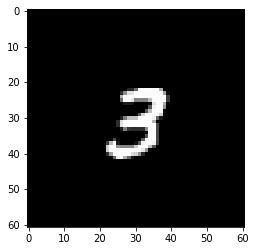

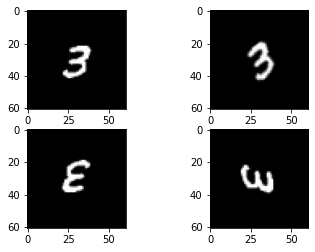

In [19]:
data = sio.loadmat("image3.mat")  # load data
im = data['image3']

m,n = im.shape

plt.figure
plt.imshow(im, cmap ='gray') # display image

nb_images = 1000;
theta = np.linspace(0,360,nb_images) # generate rotation angles
images = np.zeros((m,n,nb_images))

for i in range(nb_images):
    images[:,:,i] = rotate(im,theta[i])  # generate all images

# display a few examples 

plt.figure()
plt.subplot(2,2,1)
plt.imshow(images[:,:,0], cmap ='gray')
plt.subplot(2,2,2)
plt.imshow(images[:,:,100], cmap ='gray')
plt.subplot(2,2,3)
plt.imshow(images[:,:,500], cmap ='gray')
plt.subplot(2,2,4)
plt.imshow(images[:,:,750], cmap ='gray')

2) Compute the empirical mean of the dataset and visualize it as a 61x61 image. How do you explain its symmetries?

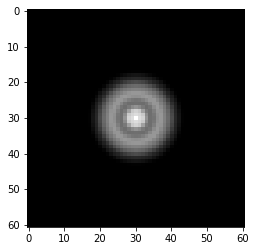

In [20]:
mean_image = np.mean(images, axis=2)

plt.figure()
plt.imshow(mean_image, cmap ='gray')
plt.show()

**Comment:** we can see a radial symmetry due to the $0^{\circ}$ to $360^{\circ}$ rotation. The gray corona - between the white corona and white inner circle - is darker because of the geometry of the 3 digit.

2) Then compute the empirical covariance of the dataset. What is its size? Display is as an image. Can you comment on its structure? Don't hesitate to zoom in on parts of the covariance matrix that are nonzero.

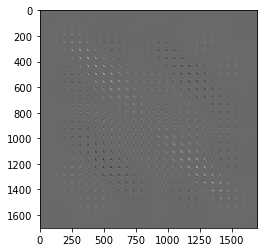

In [21]:
empirical_cov_matrix = np.cov(images.reshape(m*n,nb_images))

plt.figure()
plt.imshow(empirical_cov_matrix[1000:2700,1000:2700], cmap ='gray')
plt.show()

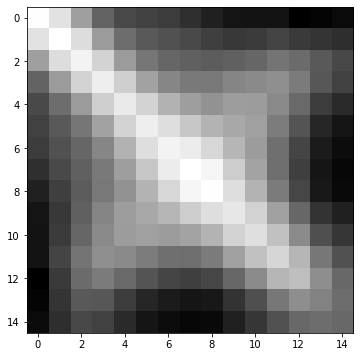

In [338]:
# Even more zoom
plt.figure()
plt.imshow(empirical_cov_matrix[1490:1505,1490:1505], cmap ='gray')
plt.show()

3) What does the 1500th row of this matrix represent? What information do you get if you display it as an image? Comment.

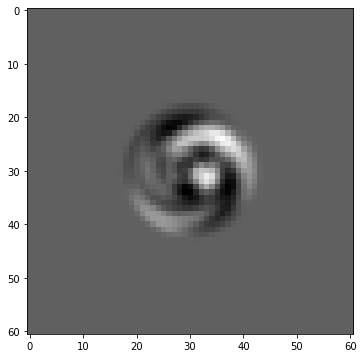

In [305]:
pixel = 1500

plt.figure()
plt.imshow(empirical_cov_matrix[pixel,:].reshape(m,n), cmap ='gray')
plt.show()


4) Compute the eigenvalue decomposition of the covariance matrix, and make sure you recover both the eigenvalues and eigenvectors (use the function eig from numpy). Plot the eigenvalues in decreasing order. What does each eigenvalue represent? Also plot the total percentage of variance explained, as a function of the number of components taken into account (hint: use the cumsum function from numpy). How many components do you think will be necessary to reconstruct the image well?

In [306]:
eigenvalues, eigenvectors = np.linalg.eig(empirical_cov_matrix)

In [307]:
eig_sum = sum(eigenvalues)
explained_variance = [(lambda_k/eig_sum) for lambda_k in sorted(eigenvalues, reverse=True)]

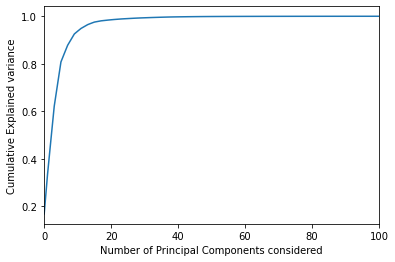

In [308]:
plt.figure(figsize=(6, 4))

plt.plot(np.cumsum(explained_variance))

plt.ylabel('Cumulative Explained variance')
plt.xlabel('Number of Principal Components considered')
plt.xlim([0, 100])
plt.show()

5) Visualize the first 16 components as images, and comment on their structure. Note that you can loop on the elements of a subplot (use e.g. a 4x4 subplot).

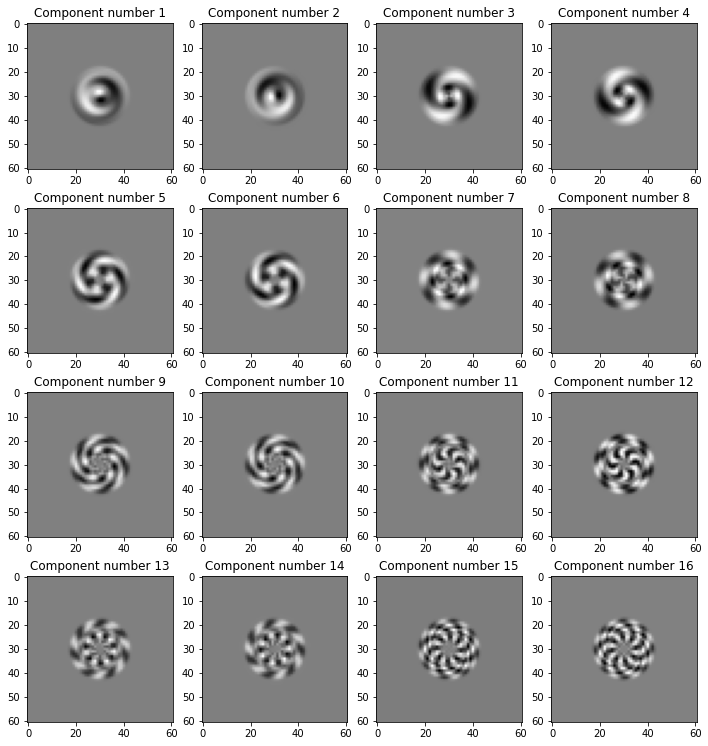

In [309]:
plt.figure(figsize=(12,13))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(eigenvectors[:,i].reshape(m,n), cmap ='gray')
    plt.title('Component number {}'.format(i+1))
plt.show()  

6) Now pick an image in the dataset and compute all the coefficients of the decomposition of this image in the PCA basis. We recall that for a given $d$-dimensional data point $\mathbf{x}_{n}\in \mathbb{R}^{D}$, the coefficients $\mathbf{a}_{n} \in \mathbb{R}^{K}$ (with $K$ the number of retained components) can be obtained by computing:
\begin{equation*}
\mathbf{a}_{n} =  \mathbf{U}_{K}^{T} \mathbf{x}_{n}
\end{equation*}
where $\mathbf{U}_{K}\in \mathbb{R}^{D\times K}$ contains the eigenvectors in its columns.
Plot the coefficients. What happens after a certain number of components? How do you explain it? Confirm your intuition by looking at the corresponding principal components.

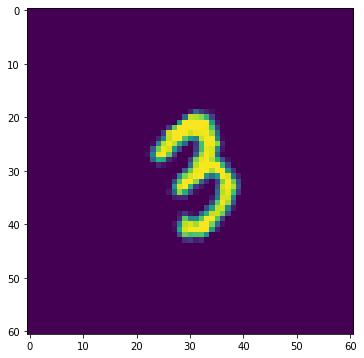

In [339]:
image_to_reconstruct = images[:,:,100]

plt.figure()
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(np.reshape(image_to_reconstruct,(m,n)))
plt.show()

In [311]:
coef = np.dot(np.transpose(eigenvectors), np.reshape(image_to_reconstruct,(m*n,1)))

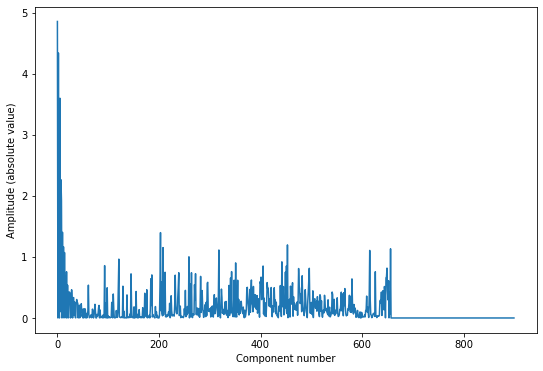

In [347]:
plt.figure(figsize=(9, 6))
plt.plot(abs(coef[0:900,0]))
plt.xlabel('Component number')
plt.ylabel('Amplitude (absolute value)')
plt.show()

6) Use a various number of components (e.g. 1,5,10,50,500,700) to reconstruct the image and compare the results. The reconstruction for all data points using K components can be obtained by computing:
\begin{equation*}
\hat{\mathbf{X}} = \mathbf{U}_{K}\mathbf{A}_{K} 
\end{equation*}
where $\hat{\mathbf{X}}\in\mathbb{R}^{D\times N}$, and  $\mathbf{U}\in \mathbb{R}^{D\times K}$, and $\mathbf{A}^{K\times N}$

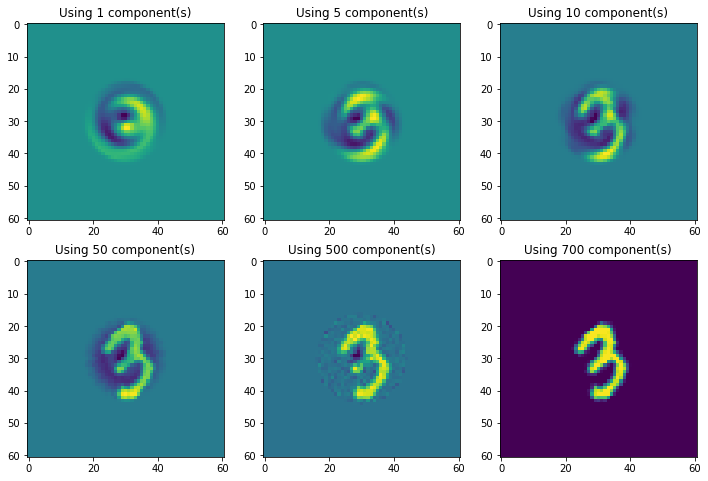

In [313]:
k = [1,5,10,50,500,700]
A = np.zeros((len(coef), len(k)))

for i in range(len(k)):
    A[0:k[i],i] = np.ndarray.flatten(coef[:k[i]])
    
X_hat = np.dot(eigenvectors, A)

plt.figure(figsize=(12,8))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_hat[:,i].reshape(m,n))
    plt.title('Using {} component(s)'.format(k[i]))
plt.show()

7) Compute and plot the compression ratio you would get if you reconstructed the whole dataset with k components, as a function of k. Hint: you need to store the principal components you retain, and the corresponding coefficients for each data point. What is the number of components from which there is no gain anymore?

In [314]:
k = linspace(1, m*n//10, m*n)

number_variables_pca = k*(m*n) + k*nb_images      
original_number_variables = (m*n)*nb_images

ratio = number_variables_pca/original_number_variables

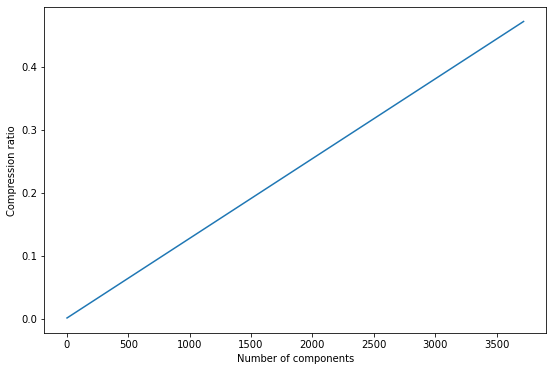

In [326]:
plt.figure(figsize=(9, 6))
plt.plot(ratio)
plt.xlabel('Number of components')
plt.ylabel('Compression ratio')
plt.show()

8) Visualize the data in 3D in two ways:

i) Using the projections on 3 (well chosen) vectors of the canonical basis of $\mathbb{R}^{3721}$
ii) Using the projections on the first 3 principal components

Compare and conclude on the intrinsic dimensionality of the data and the capacity of PCA to explain this dataset.


Text(0.5, 0, 'pixel 1799')

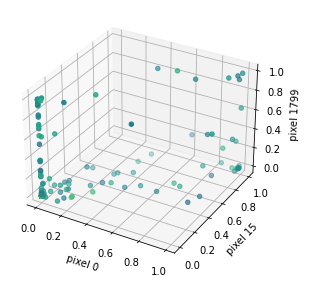

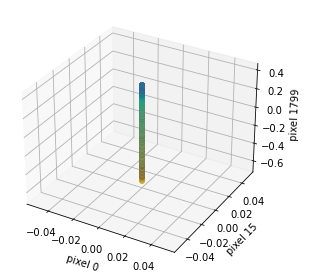

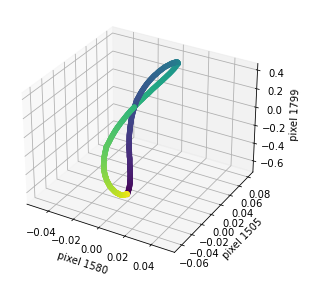

In [335]:
# %matplotlib inline
from pylab import *
data = images.reshape(nb_images,m*n)
# example of 3D scatterplot with 3 randomly chosen pixels

rcParams['figure.figsize'] = (16., 6.0)
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
ax.scatter(data[:,0], data[:,15], data[:,1799], c = theta)
ax.set_xlabel('pixel 0')
ax.set_ylabel('pixel 15')
ax.set_zlabel('pixel 1799')

coef = np.dot(np.transpose(eigenvectors), np.reshape(data,(m*n,nb_images)))
A = np.zeros((len(coef), nb_images))
A[0:3,:] = coef[:3,:]
X_hat = np.dot(eigenvectors, A)

rcParams['figure.figsize'] = (16., 6.0)
fig = plt.figure()
ax = fig.add_subplot(132, projection='3d')
ax.scatter(X_hat[0,:], X_hat[15,:], X_hat[1799,:], c = theta)
ax.set_xlabel('pixel 0')
ax.set_ylabel('pixel 15')
ax.set_zlabel('pixel 1799')

rcParams['figure.figsize'] = (16., 6.0)
fig = plt.figure()
ax = fig.add_subplot(133, projection='3d')
ax.scatter(X_hat[1580,:], X_hat[1505,:], X_hat[1799,:], c = theta)
ax.set_xlabel('pixel 1580')
ax.set_ylabel('pixel 1505')
ax.set_zlabel('pixel 1799')